# K vecinos más cercanos 

El algoritmo de aprendizaje no-supervisado basado en el agrupamiento de instancias que tienen características similares. Se aplica en el reconocimiento de patrones o como un punto de referencia para clasificadores más complejos como: las redes neuronales artificiales (ANN) y vectores de soporte (SVM)

1. Ventajas: No paramétrico, es decir que no hace suposiciones explícitas sobre la forma funcional de los datos, evitando modelar mal la distribución subyacente de los datos.

2. Desbventajas: consume muchos resursos, ya que debemos almacenar un conjunto de datos potencialmente enorme.

## El algoritmo consiste en: 

1. Calcular la distancia entre la clase a clasificar y el resto de las clases del comjunto de datos de entrenamiento.

2. Seleccionar los **k** elementos más cercanos (con menor distancia, según la función que se use)

3. Realizar una *votación de mayoría* entre los k puntos: los de una clase/etiqueta que **dominen** decidirán su clasificación final.

## Para hallar la *cercania* de un individuo a otro se pueden usar distintos tipos de distancia a continuacion las principales:

Distancia euclidiana

\begin{align}
\sqrt{\sum_{i=1}^{k}(x_i - y_i)^2}
\end{align}


Distancia manhattan

\begin{align}
\sum_{i=1}^{k}|x_i - y_i|
\end{align}

Distancia Minkowski

\begin{align}
(\sum_{i=1}^{k}(|x_i - y_i|)^q)^{1/q}
\end{align}

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn import neighbors
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = pd.read_csv('../datasets/Salary_Data.csv')
data

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [2]:
X = data[['YearsExperience']].values
Y = data['Salary'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.96
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

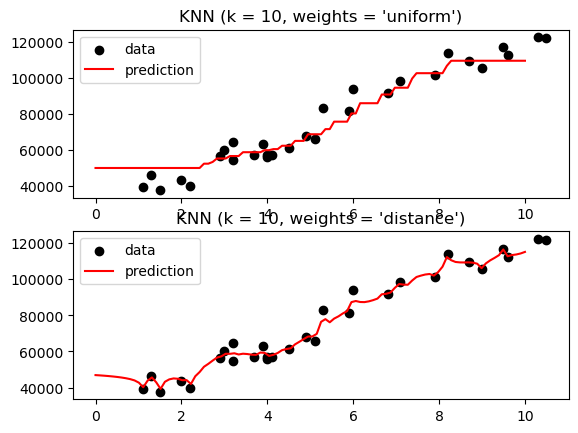

In [3]:
n_neighbors = 10
ls = np.linspace(0, 10, 100)[:, np.newaxis]

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights) 
    y_ = knn.fit(X, Y).predict(ls)
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))
     
    # Graficamos los resultados
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, Y, c='k', label='data')
    plt.plot(ls, y_, c='r', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNN (k = %i, weights = '%s')" % (n_neighbors,weights))

plt.show # Mostramos la grafica en pantalla


In [4]:
from sklearn.model_selection import GridSearchCV
#parameters = {"n_neighbors": range(1, 10)}
parameters = {"n_neighbors": range(1, 10),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']})

In [5]:
gridsearch.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [6]:
from sklearn.ensemble import BaggingRegressor

best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(bagging_model.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(bagging_model.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.97
